Design a convolutional neural network in Keras of at least 10 convolutional layers. Use the MNIST 
dataset  for  evaluation.  You  must  try  three  designs  as  detailed  below  and  provide  your 
observations on the performance of each: 
1. A regular CNN where the number of filters in each layer increases as the depth of the 
network grows i.e., the Lth layer will have more filters than the (L-1)th layer. 
2. An inverted CNN where the number of filters in each layer decreases as the depth of the 
network grows i.e., the Lth layer will have less filters than the (L-1)th layer. 
3. An hour-glass shaped CNN where the number of filters will increase till the Lth layer and 
reduce afterwards. 


Your goal is to design these networks and optimize them to their best performance by choosing the right hyperparameters for each network, such as the learning rate, batch size and the choice 
of optimizer (‘SGD’, ‘adam’, ‘RMSProp’). You must provide a detailed report of what values you 
tried for each hyperparameters, your observations on why the network performed well (or not) 
and the final accuracy for each network on the MNIST dataset.  
 

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# train_labels[0:200]

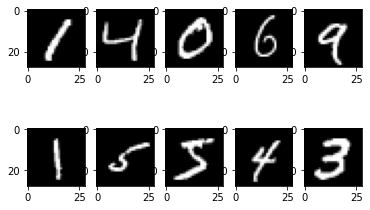

In [ ]:
fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(test_labels == i)[0]
    plottable_image = np.reshape(train_images[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray')

In [4]:
# regular CNN Model
model_regular = keras.models.Sequential([
    keras.layers.Conv2D(2, (3,3), (1,1),  activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(4, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(6, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(10, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(20, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(30, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(40, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(50, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(60, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(70, (3,3), (1,1),  activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Train the model.
epochs = 3
learning_rate = 0.01
batch_size = 50

opt = SGD(learning_rate=learning_rate)
model_regular.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

regularCNN_SGD = model_regular.fit(
    train_images,
    train_labels, 
    batch_size=batch_size,
    epochs=epochs, 
    validation_data=(test_images, test_labels)) 
#     verbose=0)

opt = Adam(learning_rate=learning_rate)
model_regular.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

regularCNN_adam = model_regular.fit(
    train_images,
    train_labels, 
    batch_size=batch_size,
    epochs=epochs, 
    validation_data=(test_images, test_labels))
#     verbose=0)

opt = RMSprop(learning_rate=learning_rate)
model_regular.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

regularCNN_RMSProp = model_regular.fit(
    train_images,
    train_labels, 
    batch_size=batch_size,
    epochs=epochs, 
    validation_data=(test_images, test_labels)) 
    # verbose=0)

Epoch 1/3
1200/1200 [==============================] - 17s 5ms/step - loss: 0.6564 - accuracy: 0.7867 - val_loss: 0.1667 - val_accuracy: 0.9458
Epoch 2/3
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1512 - accuracy: 0.9540 - val_loss: 0.1004 - val_accuracy: 0.9690
Epoch 3/3
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1014 - accuracy: 0.9680 - val_loss: 0.0819 - val_accuracy: 0.9755
Epoch 1/3
1200/1200 [==============================] - 8s 6ms/step - loss: 1.1218 - accuracy: 0.7958 - val_loss: 0.3188 - val_accuracy: 0.9019
Epoch 2/3
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3614 - accuracy: 0.8880 - val_loss: 0.2711 - val_accuracy: 0.9141
Epoch 3/3
1200/1200 [==============================] - 7s 6ms/step - loss: 0.2917 - accuracy: 0.9107 - val_loss: 0.1969 - val_accuracy: 0.9397
Epoch 1/3
1200/1200 [==============================] - 11s 7ms/step - loss: 0.3994 - accuracy: 0.8874 - val_loss: 0.4726 - val_accuracy: 0.87

### regular CNN

#### 1. learning rate

We test with multiple learning rates for this CNN and the list for learning rate  and final accuracy (for all optimizers) is given below:

```
epoch =3, batch size = 100
learning rate     accuracy on training data 
                    SGD.  Adam. RMSprop
0.1                 0.11  0.10  0.10
0.01                0.95  0.11  0.11
0.001               0.11  0.98  0.98
0.0001              0.12  0.96  0.97
```

#### 2. batch size 
We test with multiple batch sizes for this CNN and the list for batch size and final accuracy (for all optimizers) is given below:

```
epoch =3, learning rate = 0.01
batch size.      accuracy on training data 
                    SGD.  Adam. RMSprop
50                  0.97  0.11  0.11
100                 0.95  0.11  0.11
500                 0.65  0.93  0.11
1000                0.12  0.11  0.11
```

**We conclude the best learning rate and batch sizes for these optimizers would be:** 
```
                  SGD    Adam    RMSprop
learning rate     0.01   0.001    0.001
batch size        50     100      100
```

##### visual representation

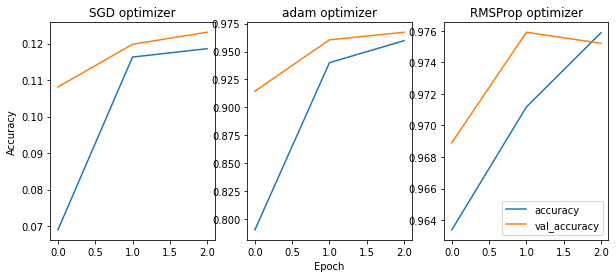

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
ax[0].plot(regularCNN_SGD.history['accuracy'], label='accuracy')
ax[0].plot(regularCNN_SGD.history['val_accuracy'], label = 'val_accuracy')
ax[1].plot(regularCNN_adam.history['accuracy'], label='accuracy')
ax[1].plot(regularCNN_adam.history['val_accuracy'], label = 'val_accuracy')
ax[2].plot(regularCNN_RMSProp.history['accuracy'], label='accuracy')
ax[2].plot(regularCNN_RMSProp.history['val_accuracy'], label = 'val_accuracy')

ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
plt.legend()
ax[0].set_title('SGD optimizer')
ax[1].set_title('adam optimizer')
ax[2].set_title('RMSProp optimizer')
plt.show()

In [8]:
# inverted CNN Model
model_inverted = keras.models.Sequential([
    keras.layers.Conv2D(70, (3,3), (1,1),  activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(60, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(50, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(40, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(30, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(20, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(10, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(6, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(4, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(2, (3,3), (1,1),  activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Train the model.
epochs = 2
learning_rate = 0.005
batch_size = 100

opt = SGD(learning_rate=learning_rate)
model_inverted.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

invertedCNN_SGD =  model_inverted.fit(
    train_images,
    train_labels, 
    batch_size=batch_size,
    epochs=epochs, 
    validation_data=(test_images, test_labels)) 
#     verbose=0)

opt = Adam(learning_rate=learning_rate)
model_inverted.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

invertedCNN_adam =  model_inverted.fit(
    train_images,
    train_labels, 
    batch_size=batch_size,
    epochs=epochs, 
    validation_data=(test_images, test_labels))
#     verbose=0)

opt = RMSprop(learning_rate=learning_rate)
model_inverted.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

invertedCNN_RMSProp =  model_inverted.fit(
    train_images,
    train_labels, 
    batch_size=batch_size,
    
    epochs=epochs, 
    validation_data=(test_images, test_labels)) 
    # verbose=0)

Epoch 1/2
600/600 [==============================] - 5s 7ms/step - loss: 2.2883 - accuracy: 0.1655 - val_loss: 2.2585 - val_accuracy: 0.2085
Epoch 2/2
600/600 [==============================] - 4s 6ms/step - loss: 1.2953 - accuracy: 0.5686 - val_loss: 0.5653 - val_accuracy: 0.8196
Epoch 1/2
600/600 [==============================] - 5s 7ms/step - loss: 0.4603 - accuracy: 0.8454 - val_loss: 0.1694 - val_accuracy: 0.9474
Epoch 2/2
600/600 [==============================] - 4s 7ms/step - loss: 0.1475 - accuracy: 0.9554 - val_loss: 0.1096 - val_accuracy: 0.9680
Epoch 1/2
600/600 [==============================] - 6s 8ms/step - loss: 0.1888 - accuracy: 0.9456 - val_loss: 0.2415 - val_accuracy: 0.9272
Epoch 2/2
600/600 [==============================] - 5s 8ms/step - loss: 0.1502 - accuracy: 0.9554 - val_loss: 0.1213 - val_accuracy: 0.9645


### inverted CNN

#### 1. learning rate
We test with multiple learning rates for this CNN and the list for learning rate  and final accuracy (for all optimizers) is given below:

```
epoch = 2, batch size = 100
learning rate     accuracy on training data 
                    SGD.  Adam. RMSprop
0.1                 0.11  0.10  0.10
0.01                0.73  0.11  0.11
0.001               0.13  0.96  0.97
0.0001              0.15  0.92  0.94
```


#### 2. batch size 
We test with multiple batch sizes for this CNN and the list for batch size and final accuracy (for all optimizers) is given below:

```
epoch =2, learning rate = 0.005
batch size.      accuracy on training data 
                    SGD.  Adam. RMSprop
50                  0.90  0.94  0.94
100                 0.71  0.95  0.95
500                 0.14  0.94  0.93
```

**We conclude the best learning rate and batch sizes for these optimizers would be:** 
```
                  SGD    Adam    RMSprop
learning rate     0.01   0.001    0.001
batch size        50     100      100
```


##### visual representation

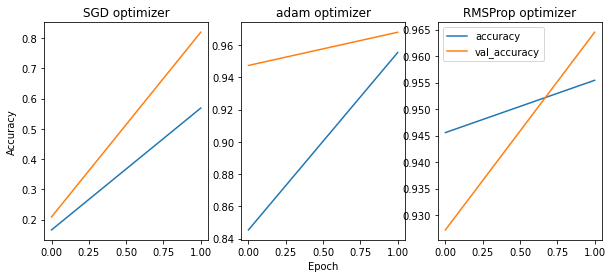

In [16]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
ax[0].plot(invertedCNN_SGD.history['accuracy'], label='accuracy')
ax[0].plot(invertedCNN_SGD.history['val_accuracy'], label = 'val_accuracy')
ax[1].plot(invertedCNN_adam.history['accuracy'], label='accuracy')
ax[1].plot(invertedCNN_adam.history['val_accuracy'], label = 'val_accuracy')
ax[2].plot(invertedCNN_RMSProp.history['accuracy'], label='accuracy')
ax[2].plot(invertedCNN_RMSProp.history['val_accuracy'], label = 'val_accuracy')

ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
plt.legend()
ax[0].set_title('SGD optimizer')
ax[1].set_title('adam optimizer')
ax[2].set_title('RMSProp optimizer')
plt.show()

In [15]:
# hourglass CNN Model
model_hourglass = keras.models.Sequential([
    keras.layers.Conv2D(2, (3,3), (1,1),  activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(4, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(8, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(16, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(32, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(32, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(16, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(8, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(4, (3,3), (1,1),  activation='relu'),
    keras.layers.Conv2D(2, (3,3), (1,1),  activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Train the model.
epochs = 2
learning_rate = 0.005
batch_size = 500

opt = SGD(learning_rate=learning_rate)
model_hourglass.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

hourglassCNN_SGD =  model_hourglass.fit(
    train_images,
    train_labels, 
    batch_size=batch_size,
    epochs=epochs, 
    validation_data=(test_images, test_labels)) 
#     verbose=0)

opt = Adam(learning_rate=learning_rate)
model_hourglass.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

hourglassCNN_adam =  model_hourglass.fit(
    train_images,
    train_labels, 
    batch_size=batch_size,
    epochs=epochs, 
    validation_data=(test_images, test_labels))
#     verbose=0)

opt = RMSprop(learning_rate=learning_rate)
model_hourglass.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

hourglassCNN_RMSProp =  model_hourglass.fit(
    train_images,
    train_labels, 
    batch_size=batch_size,
    epochs=epochs, 
    validation_data=(test_images, test_labels)) 
    # verbose=0)

Epoch 1/2
120/120 [==============================] - 2s 10ms/step - loss: 2.2993 - accuracy: 0.1883 - val_loss: 2.2968 - val_accuracy: 0.2096
Epoch 2/2
120/120 [==============================] - 1s 8ms/step - loss: 2.2942 - accuracy: 0.2085 - val_loss: 2.2904 - val_accuracy: 0.2084
Epoch 1/2
120/120 [==============================] - 2s 9ms/step - loss: 0.5869 - accuracy: 0.8095 - val_loss: 0.2179 - val_accuracy: 0.9320
Epoch 2/2
120/120 [==============================] - 1s 8ms/step - loss: 0.1903 - accuracy: 0.9423 - val_loss: 0.1462 - val_accuracy: 0.9549
Epoch 1/2
120/120 [==============================] - 3s 11ms/step - loss: 4.2036 - accuracy: 0.8515 - val_loss: 0.1958 - val_accuracy: 0.9409
Epoch 2/2
120/120 [==============================] - 1s 9ms/step - loss: 0.3363 - accuracy: 0.9005 - val_loss: 0.4128 - val_accuracy: 0.8812


### hourglass CNN
#### 1. learning rate

We test with multiple learning rates for this CNN and the list for learning rate  and final accuracy (for all optimizers) is given below:

```
epoch = 2, batch size = 100
learning rate     accuracy on training data 
                    SGD.  Adam. RMSprop
0.1                 0.11  0.10  0.10
0.01                0.58  0.11  0.11
0.001               0.16  0.95  0.97
```


#### 2. batch size 
We test with multiple batch sizes for this CNN and the list for batch size and final accuracy (for all optimizers) is given below:

```
epoch =2, learning rate = 0.005
batch size.      accuracy on training data 
                    SGD.  Adam. RMSprop
50                  0.79  0.11  0.11
100                 0.36  0.94  0.95
500                 0.21  0.94  0.90
```

**We conclude the best learning rate and batch sizes for these optimizers would be:** 
```
                  SGD    Adam    RMSprop
learning rate     0.01   0.001    0.001
batch size        50     100      100
```

##### visual representation

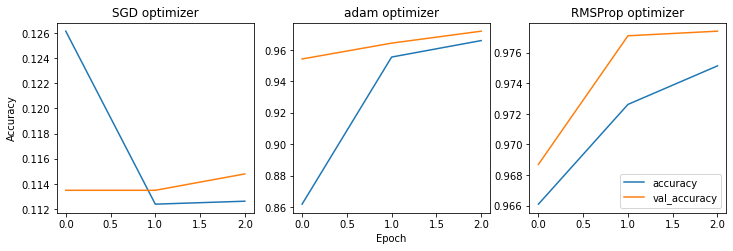

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,4a))
ax[0].plot(hourglassCNN_SGD.history['accuracy'], label='accuracy')
ax[0].plot(hourglassCNN_SGD.history['val_accuracy'], label = 'val_accuracy')
ax[1].plot(hourglassCNN_adam.history['accuracy'], label='accuracy')
ax[1].plot(hourglassCNN_adam.history['val_accuracy'], label = 'val_accuracy')
ax[2].plot(hourglassCNN_RMSProp.history['accuracy'], label='accuracy')
ax[2].plot(hourglassCNN_RMSProp.history['val_accuracy'], label = 'val_accuracy')

ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
plt.legend()
ax[0].set_title('SGD optimizer')
ax[1].set_title('adam optimizer')
ax[2].set_title('RMSProp optimizer')
plt.show()

### Performance of the networks

We choose the following (optimize, epoch, batch size, learning rate) for the neworks:
1. regular CNN: (SGD, 10, 50, 0.01)
1. inverted CNN: (RMSprop, 10, 100, 0.001)
1. hourglass CNN: (RMSprop, 10, 100, 0.001)

#### 1. regular CNN

In [18]:
opt = SGD(learning_rate=0.01)
model_regular.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
regularCNN_SGD = model_regular.fit(
    train_images,
    train_labels, 
    batch_size=50,
    epochs=10, 
    validation_data=(test_images, test_labels)) 
#     verbose=0)

Epoch 1/10
1200/1200 [==============================] - 7s 5ms/step - loss: 0.1489 - accuracy: 0.9553 - val_loss: 0.1484 - val_accuracy: 0.9574
Epoch 2/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1486 - accuracy: 0.9553 - val_loss: 0.1390 - val_accuracy: 0.9595
Epoch 3/10
1200/1200 [==============================] - 7s 5ms/step - loss: 0.1451 - accuracy: 0.9563 - val_loss: 0.1410 - val_accuracy: 0.9592
Epoch 4/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1430 - accuracy: 0.9566 - val_loss: 0.1335 - val_accuracy: 0.9603
Epoch 5/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1394 - accuracy: 0.9586 - val_loss: 0.1348 - val_accuracy: 0.9598
Epoch 6/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1355 - accuracy: 0.9591 - val_loss: 0.1434 - val_accuracy: 0.9569
Epoch 7/10
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1353 - accuracy: 0.9601 - val_loss: 0.1232 - val_accuracy:

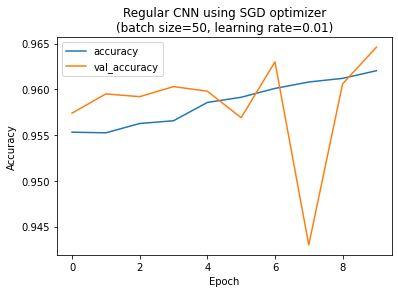

In [31]:
plt.plot(regularCNN_SGD.history['accuracy'], label='accuracy')
plt.plot(regularCNN_SGD.history['val_accuracy'], label = 'val_accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Regular CNN using SGD optimizer\n(batch size=50, learning rate=0.01)')
plt.show()

#### 2. inverted CNN

In [22]:
opt = RMSprop(learning_rate=0.001)
model_inverted.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

invertedCNN_RMSProp =  model_inverted.fit(
    train_images,
    train_labels, 
    batch_size=100,
    epochs=10, 
    validation_data=(test_images, test_labels)) 
    # verbose=0)

Epoch 1/10
600/600 [==============================] - 6s 8ms/step - loss: 0.0662 - accuracy: 0.9803 - val_loss: 0.0645 - val_accuracy: 0.9806
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0546 - accuracy: 0.9837 - val_loss: 0.0672 - val_accuracy: 0.9814
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0658 - val_accuracy: 0.9824
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.0630 - val_accuracy: 0.9814
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0596 - val_accuracy: 0.9836
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0648 - val_accuracy: 0.9829
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0414 - accuracy: 0.9878 - val_loss: 0.0646 - val_accuracy: 0.9830
Epoch 

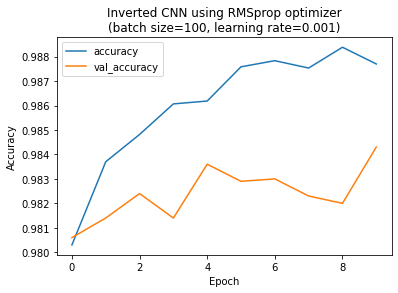

In [30]:
plt.plot(invertedCNN_RMSProp.history['accuracy'], label='accuracy')
plt.plot(invertedCNN_RMSProp.history['val_accuracy'], label = 'val_accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Inverted CNN using RMSprop optimizer\n(batch size=100, learning rate=0.001)')
plt.show()

#### 3. hourglass CNN

In [24]:
opt = RMSprop(learning_rate=0.001)
model_hourglass.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

hourglassCNN_RMSProp =  model_hourglass.fit(
    train_images,
    train_labels, 
    batch_size=100,
    epochs=10, 
    validation_data=(test_images, test_labels)) 
    # verbose=0)

Epoch 1/10
600/600 [==============================] - 6s 7ms/step - loss: 0.1146 - accuracy: 0.9646 - val_loss: 0.0876 - val_accuracy: 0.9737
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0900 - accuracy: 0.9730 - val_loss: 0.0708 - val_accuracy: 0.9783
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.0742 - val_accuracy: 0.9780
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0706 - accuracy: 0.9787 - val_loss: 0.0619 - val_accuracy: 0.9816
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0647 - accuracy: 0.9804 - val_loss: 0.0748 - val_accuracy: 0.9779
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0604 - accuracy: 0.9814 - val_loss: 0.0720 - val_accuracy: 0.9800
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.0842 - val_accuracy: 0.9773
Epoch 

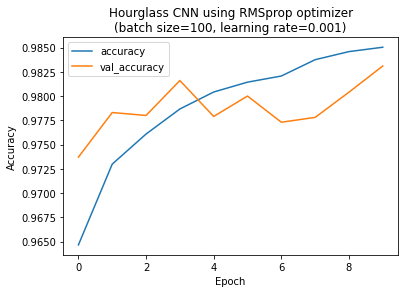

In [29]:
plt.plot(hourglassCNN_RMSProp.history['accuracy'], label='accuracy')
plt.plot(hourglassCNN_RMSProp.history['val_accuracy'], label = 'val_accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Hourglass CNN using RMSprop optimizer\n(batch size=100, learning rate=0.001)')
plt.show()